In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data Preprocessing

In [3]:
data.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [4]:
data.shape

(50, 5)

In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
data = pd.get_dummies(data, columns=['State'])
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


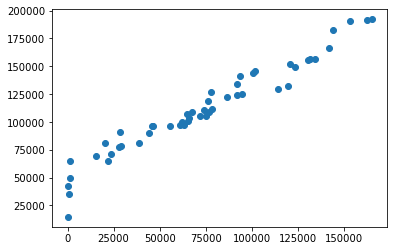

In [8]:
plt.scatter(x=data['R&D Spend'], y=data['Profit'])

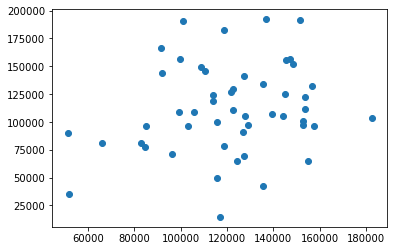

In [9]:
plt.scatter(x=data.Administration, y=data.Profit)

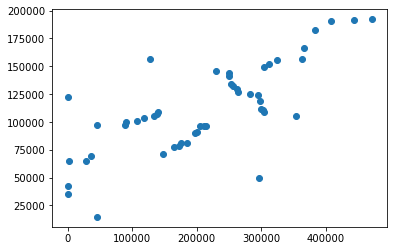

In [10]:
plt.scatter(x=data['Marketing Spend'], y=data.Profit)

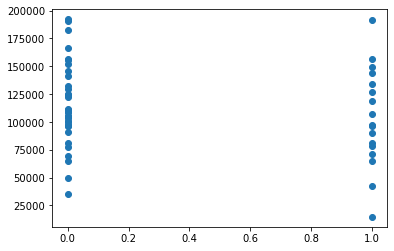

In [11]:
plt.scatter(x=data.State_California, y=data.Profit)

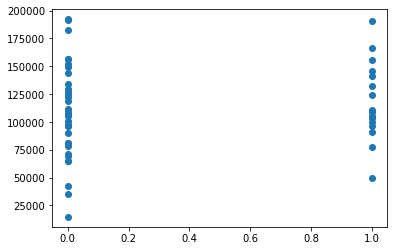

In [12]:
plt.scatter(x=data.State_Florida, y=data.Profit)

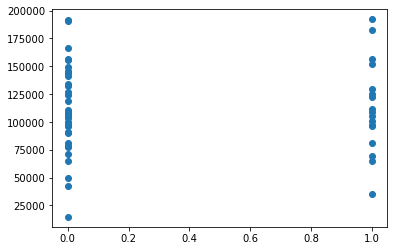

In [13]:
plt.scatter(x=data['State_New York'], y=data.Profit)

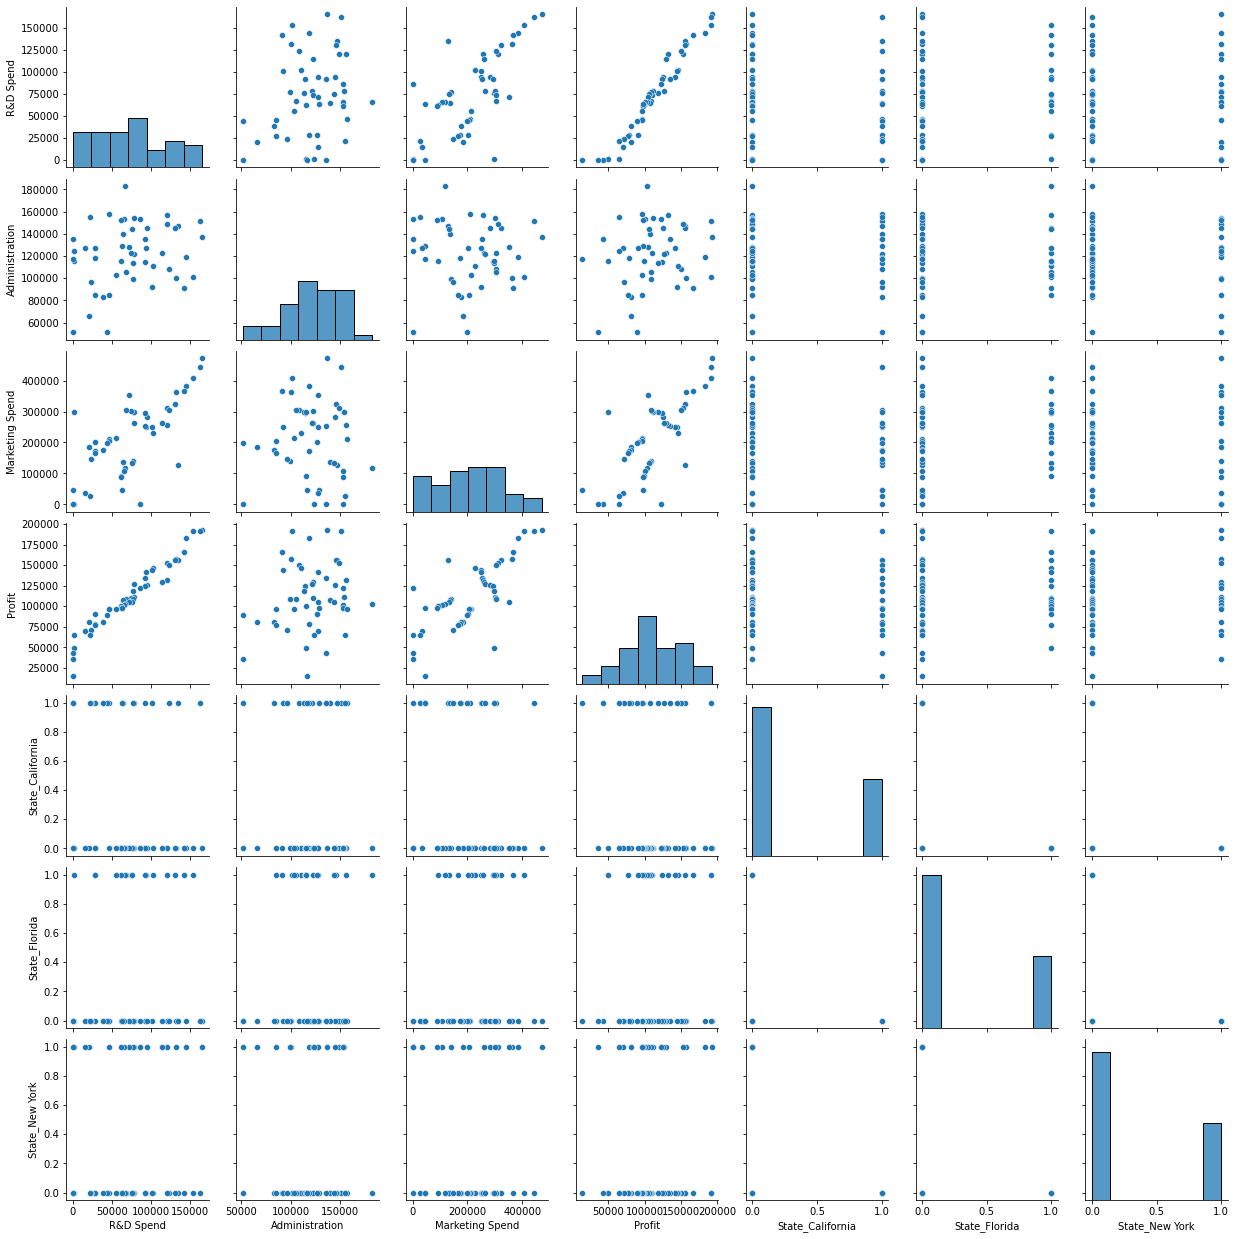

In [14]:
sns.pairplot(data)

In [15]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [16]:
X = np.array(data)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
print(vif)
X=pd.DataFrame()

[19.604937249066566, 1.1849210076099637, 2.552858458745251, 20.30559281026129, 19.939371136591333, 19.77949232706901, 20.100086533770376]


In [17]:
x = data.drop(columns='Profit')
y = data['Profit']

In [18]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [19]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35, 6)
(35,)
(15, 6)
(15,)


In [22]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [23]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)

Ridge()

In [24]:
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)

Lasso()

In [25]:
cv_score = cross_val_score(estimator=linear_model,X=x,y=y,cv=5)
cv_score

array([ 0.8890891 , -1.00022611, -0.78958092, -0.76036588,  0.38538399])

In [26]:
cv_score = cross_val_score(estimator=ridge_model,X=x,y=y,cv=5)
cv_score

array([ 0.88943844, -0.98588862, -0.76219257, -0.75576862,  0.38918751])

In [27]:
cv_score = cross_val_score(estimator=lasso_model,X=x,y=y,cv=5)
cv_score

array([ 0.88911985, -0.99979247, -0.78847095, -0.7600613 ,  0.38547958])

In [28]:
y_train_pred = linear_model.predict(x_train)
y_train_pred

array([155921.27674876,  77208.49795044,  56699.64765224,  45053.8900705 ,
       144519.42380621, 155331.67809095, 116531.06376223, 113078.44588257,
        86308.44745627,  93929.25452826, 190021.93909165,  61932.35539078,
       112463.86396514,  99159.28659864, 163405.78914522,  98027.50915478,
       137080.30550734,  74993.46531006, 186938.24621017, 113655.89174396,
       183600.80769199,  58031.35484446,  91222.97165153, 111133.59648917,
        74589.73702978, 136243.70997923, 114740.16696175, 129581.20159297,
        48004.85201342, 116783.64725802, 158562.13360413,  71818.05046182,
       147330.95975595,  97686.32641369,  71642.66618593])

In [29]:
y_test_pred = linear_model.predict(x_test)
y_test_pred

array([126187.39411512,  85788.82259491,  99777.02815161,  45706.12238325,
       127062.20722786,  51891.83884406, 109114.62977498, 100600.61123707,
        97953.99874704, 111730.57706801, 128818.49200667, 174195.35772605,
        93736.28538396, 148381.04097173, 172313.87139382])

In [30]:
y_test_pred_ridge = ridge_model.predict(x_test)
y_train_pred_ridge = ridge_model.predict(x_train)
print('y_test_pred_ridge {}:'.format(y_test_pred_ridge))
print('y_train_pred_ridge {}:'.format(y_train_pred_ridge))

y_test_pred_ridge [126170.17410222  85763.18028032  99705.94384985  45782.96141809
 127151.36490929  51950.22905633 109052.08702895 100578.83583866
  97920.00804208 111793.44800938 128759.57051223 174127.89463308
  93703.61406775 148467.82680542 172394.84298797]:
y_train_pred_ridge [155882.96877209  77145.94664517  56665.88358601  45032.24554471
 144595.71249036 155305.52003131 116515.05058673 113145.0539103
  86303.65299632  94007.7092046  190111.87583305  61913.17337524
 112561.86998554  99099.94356066 163482.88913638  98106.97822306
 137049.53587905  74945.41070684 186928.14526549 113753.14335018
 183537.5072583   58109.0378213   91300.67759902 111081.66693443
  74575.30722533 136176.31991557 114690.79469453 129524.33375829
  47983.40292003 116769.81170212 158506.76694621  71796.54869454
 147273.69294571  97634.13504505  71719.74745647]:


In [31]:
y_test_pred_lasso = lasso_model.predict(x_test)
y_train_pred_lasso = lasso_model.predict(x_train)
print('y_test_pred_lasso {}:'.format(y_test_pred_lasso))
print('y_train_pred_lasso {}:'.format(y_train_pred_lasso))

y_test_pred_lasso [126187.57170669  85788.61575824  99773.12277927  45708.81663231
 127065.77947028  51893.77453188 109111.13364099 100600.42422312
  97953.12093254 111732.49695519 128815.34491466 174191.9936994
  93735.82424014 148384.51711887 172317.20478956]:
y_train_pred_lasso [155920.22868053  77205.17560086  56697.8452635   45053.56808215
 144522.37907651 155331.5269876  116531.34781784 113080.83651064
  86309.15159198  93932.05707227 190025.77746614  61932.14243292
 112467.99958729  99156.13718872 163408.95015844  98030.38270111
 137079.90184854  74990.81208273 186938.95406595 113659.86937895
 183597.67577118  58034.12078605  91226.0255506  111130.91251283
  74590.00754545 136240.15382441 114737.56967596 129578.23841798
  48004.63312155 116784.09682892 158559.20339882  71817.99100191
 147327.83395383  97683.24230384  71645.711712  ]:


In [32]:
print('MSE is :',mean_squared_error(y_train,y_train_pred))
print('r2_score is :',r2_score(y_train,y_train_pred))

MSE is : 81555412.19861057
r2_score is : 0.9511471170962384


In [33]:
print('MSE is :',mean_squared_error(y_test,y_test_pred))
print('r2_score is :',r2_score(y_test,y_test_pred))

MSE is : 84826955.03371611
r2_score is : 0.9397108063367285


In [34]:
print('MSE is :',mean_squared_error(y_train,y_train_pred_ridge))
print('r2_score is :',r2_score(y_train,y_train_pred_ridge))

MSE is : 81558736.34066105
r2_score is : 0.951145125886606


In [35]:
print('MSE is :',mean_squared_error(y_test,y_test_pred_ridge))
print('r2_score is :',r2_score(y_test,y_test_pred_ridge))

MSE is : 84533674.92476283
r2_score is : 0.9399192497646371


In [36]:
print('MSE is :',mean_squared_error(y_train,y_train_pred_lasso))
print('r2_score is :',r2_score(y_train,y_train_pred_lasso))

MSE is : 81555418.52999641
r2_score is : 0.9511471133036459


In [37]:
print('MSE is :',mean_squared_error(y_test,y_test_pred_lasso))
print('r2_score is :',r2_score(y_test,y_test_pred_lasso))

MSE is : 84815563.97509885
r2_score is : 0.9397189023215335


In [38]:
std = StandardScaler()
data_std = std.fit_transform(data)
data_std = pd.DataFrame(data_std, columns = data.columns)

In [39]:
import statsmodels.api as sm

In [40]:
model = sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           4.27e-18
Time:                        09:39:52   Log-Likelihood:                -368.46
No. Observations:                  35   AIC:                             748.9
Df Residuals:                      29   BIC:                             758.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8049      0.056  

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
model = sm.OLS(y_test,x_test).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     53.35
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           2.04e-06
Time:                        09:39:52   Log-Likelihood:                -153.60
No. Observations:                  15   AIC:                             319.2
Df Residuals:                       9   BIC:                             323.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7324      0.126  

In [43]:
rf = RandomForestRegressor( n_estimators=1200,random_state = 0)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1200, random_state=0)

In [44]:
dt = DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=45)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=45)

In [45]:
y_train_dt_pred = dt.predict(x_train)

In [46]:
y_test_dt_pred =dt.predict(x_test)

In [47]:
print('MSE is :',mean_squared_error(y_train,y_train_dt_pred))
print('r2_score is :',r2_score(y_train,y_train_dt_pred))

MSE is : 56769268.531771734
r2_score is : 0.9659943791178326


In [48]:
print('MSE is :',mean_squared_error(y_test,y_test_dt_pred))
print('r2_score is :',r2_score(y_test,y_test_dt_pred))

MSE is : 188614069.9831429
r2_score is : 0.8659460287321199


In [49]:
y_train_rf_pred = rf.predict(x_train)

In [50]:
y_test_rf_pred = rf.predict(x_test)

In [51]:
print('MSE is :',mean_squared_error(y_train,y_train_rf_pred))
print('r2_score is :',r2_score(y_train,y_train_dt_pred))

MSE is : 13462940.542209655
r2_score is : 0.9659943791178326


In [52]:
print('MSE is :',mean_squared_error(y_test,y_test_rf_pred))
print('r2_score is :',r2_score(y_test,y_test_dt_pred))

MSE is : 90454131.10438965
r2_score is : 0.8659460287321199


LINEAR MODEL 
TRAIN: r2_score is : 0.9511471170962384
TEST: r2_score is : 0.9397108063367285
DECISIONTREE REGRESSOR
TRAIN: r2_score is : 0.9659943791178326
TEST: r2_score is : 0.8659460287321199
RANDOMFOREST REGRESSOR 
TRAIN: r2_score is : 0.9659943791178326
TEST: r2_score is : 0.8659460287321199
LASSO MODEL
TRAIN:r2_score is : 0.9511471133036459
TEST:r2_score is : 0.9397189023215335
RIDGE MODEL
TRAIN:r2_score is : 0.951145125886606
TEST:r2_score is : 0.9399192497646371